In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd

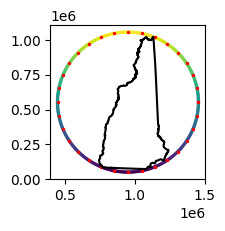

In [2]:
# Get radius
state = gpd.read_file("../redistricting/data_prep/output/nh_2020/")
state_dissolved = state.dissolve()
state_min_radius = state_dissolved.geometry.minimum_bounding_radius()[0]
state_min_circle = state_dissolved.geometry.minimum_bounding_circle()[0]
state_min_circle_o = state_min_circle.centroid

x_vals = np.array([c[0] for c in state_dissolved.geometry.exterior[0].coords])
y_vals = np.array([c[1] for c in state_dissolved.geometry.exterior[0].coords])
state_points = np.vstack([x_vals, y_vals]).T

## Create Circle
r = state_min_radius
origin = state_min_circle_o
degrees = np.linspace(0, 359, 360)
radians = np.radians(degrees)
circumference_points = r*np.vstack([np.cos(radians), np.sin(radians)]).T
radius_slopes = np.sin(radians)/np.cos(radians)
circumference_points = circumference_points + np.array([origin.x, origin.y])
plt.figure(figsize=(2,2))
plt.plot(state_points[:,0], state_points[:,1], color="black")

plt.scatter(circumference_points[:,0],circumference_points[:,1], c=circumference_points[:,1], s=2)
plt.scatter(state_min_circle.exterior.coords.xy[0],state_min_circle.exterior.coords.xy[1], s=2, color="red")

In [3]:
x_vals = np.array([c[0] for c in state_dissolved.geometry.exterior[0].coords])
y_vals = np.array([c[1] for c in state_dissolved.geometry.exterior[0].coords])
state_points = np.vstack([x_vals, y_vals]).T

C:\Users\yagne\AppData\Local\Temp\ipykernel_30108\2506646116.py:2: RuntimeWarning: divide by zero encountered in divide
  tangent_slopes = -(1 / radius_slopes)


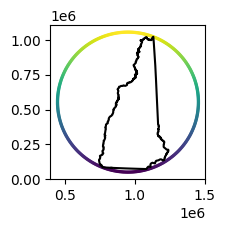

In [4]:
## Create Tangent Line
tangent_slopes = -(1 / radius_slopes)
plt.figure(figsize=(2, 2))

point = 0
xrange = np.linspace(
    circumference_points[point, 0] * 0.5, circumference_points[point, 0] * 1.5, 10
)

plt.plot(x_vals, y_vals, color="black")
plt.plot(
    xrange,
    (tangent_slopes[point] * (xrange - circumference_points[point, 0]))
    + circumference_points[point, 1],
    color="green",
    linewidth=3,
)
plt.scatter(circumference_points[:,0],circumference_points[:,1], c=circumference_points[:,1], s=2)


In [5]:
def rotate_vector(orig_vector, degree, origin = np.array([0,0])):
    """
    Rotate a 2-D vector (point) by some given degree. Optionally around a specified origin besides (0,0).
    Supports multiple points.

    Parameters
    ----------
    orig_vector : np.array 
                 Original vector(s) of size (2,) or (n,2)
    degree : float
             Counter-clockwise rotation amount in degrees
    origin : np.array
            Origin of rotation
    """
    vector = np.array(orig_vector)
    origin = np.array(origin)

    if vector.ndim == 1:
        vector = np.expand_dims(vector, axis=0)
    vector = vector - origin # center of circle

    theta = np.radians(degree)
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])

    vector = (rotation_matrix @ vector.T).T
    vector = vector + origin
    return vector

rotate_vector([[0,0], [2,2]], 270, [1,1])
    

array([[ 2.22044605e-16,  2.00000000e+00],
       [ 2.00000000e+00, -2.22044605e-16]])

In [6]:
state_points.shape

(14981, 2)

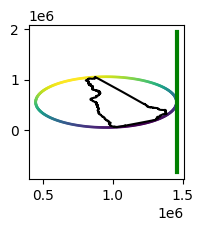

In [7]:
point= 330
xrange = np.linspace(
    circumference_points[point, 0] * 0.5, circumference_points[point, 0] * 1.5, 10
)

rotated_state = rotate_vector(state_points, 360-point, np.array([origin.x, origin.y]))
rotated_circumference = rotate_vector(circumference_points, 360-point, np.array([origin.x, origin.y]))
tangent_points = np.vstack([xrange,(tangent_slopes[point] * (xrange - circumference_points[point, 0])) + circumference_points[point, 1]]).T
rotated_tangent = rotate_vector(tangent_points, 360-point, np.array([origin.x, origin.y]))


plt.figure(figsize=(2, 2))
plt.plot(rotated_state[:,0], rotated_state[:,1], color="black")
plt.plot(
    rotated_tangent[:,0],
    rotated_tangent[:,1],
    color="green",
    linewidth=3,
)
plt.scatter(rotated_circumference[:, 0], rotated_circumference[:, 1], s=1, c=circumference_points[:, 1])
